In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.preprocessing as preproc #для маштобирования minmax
import seaborn as sns #для корреляции

In [2]:
datatr = pd.read_csv('datatraining.txt')
datatr

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


In [3]:
datatr.shape[0]

8143

In [4]:
datatr.drop_duplicates(keep = 'first', inplace=True)

In [5]:
datatr.shape[0]

8143

<AxesSubplot:>

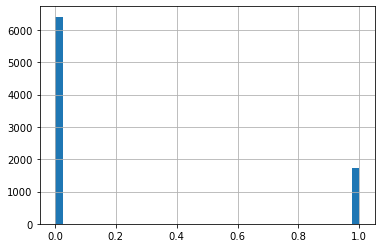

In [6]:
datatr.Occupancy.hist(bins = 40)

In [7]:
datatr['Occupancy'].value_counts()

0    6414
1    1729
Name: Occupancy, dtype: int64

(array([1, 2, 3, 4, 5, 6]),
 [Text(1, 0, 'Temperature'),
  Text(2, 0, 'Humidity'),
  Text(3, 0, 'Light'),
  Text(4, 0, 'CO2'),
  Text(5, 0, 'HumidityRatio'),
  Text(6, 0, 'Occupancy')])

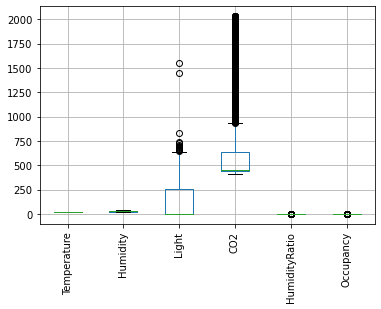

In [8]:
datatr.boxplot()
plt.xticks(rotation = 90)

In [9]:
datatr['Temperature'] = preproc.minmax_scale(datatr[['Temperature']])
datatr['Humidity'] = preproc.minmax_scale(datatr[['Humidity']])
datatr['Light'] = preproc.minmax_scale(datatr[['Light']])
datatr['CO2'] = preproc.minmax_scale(datatr[['CO2']])
datatr['HumidityRatio'] = preproc.minmax_scale(datatr[['HumidityRatio']])
datatr['Occupancy'] = preproc.minmax_scale(datatr[['Occupancy']])

(array([1, 2, 3, 4, 5, 6]),
 [Text(1, 0, 'Temperature'),
  Text(2, 0, 'Humidity'),
  Text(3, 0, 'Light'),
  Text(4, 0, 'CO2'),
  Text(5, 0, 'HumidityRatio'),
  Text(6, 0, 'Occupancy')])

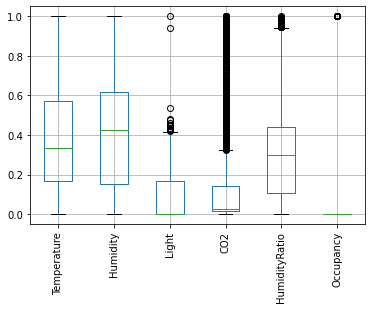

In [10]:
datatr.boxplot()
plt.xticks(rotation = 90)

In [11]:
datatr.nunique()  #уникальные значения по оси столбца

date             8143
Temperature       265
Humidity         1325
Light             889
CO2              2282
HumidityRatio    3582
Occupancy           2
dtype: int64

In [12]:
datatr.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy        float64
dtype: object

In [13]:
datatr["Temperature"]=datatr["Temperature"].astype('category')

In [14]:
datatr["date"]=datatr["Temperature"].cat.codes
datatr

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,264,1.000000,0.470533,0.275490,0.190933,0.557318,1.0
2,263,0.992823,0.470332,0.277754,0.186446,0.554807,1.0
3,263,0.992823,0.469326,0.275490,0.186136,0.553761,1.0
4,263,0.992823,0.467315,0.275490,0.182887,0.551669,1.0
5,262,0.980861,0.467315,0.275490,0.180566,0.547851,1.0
...,...,...,...,...,...,...,...
8139,129,0.490431,0.865013,0.280017,0.231781,0.763986,1.0
8140,129,0.490431,0.860431,0.280017,0.233173,0.759782,1.0
8141,132,0.502392,0.864901,0.280017,0.238744,0.768438,1.0
8142,132,0.502392,0.872276,0.280017,0.252256,0.775226,1.0


In [15]:
datatr["Temperature"]=datatr["Temperature"].astype('float64')

<AxesSubplot:>

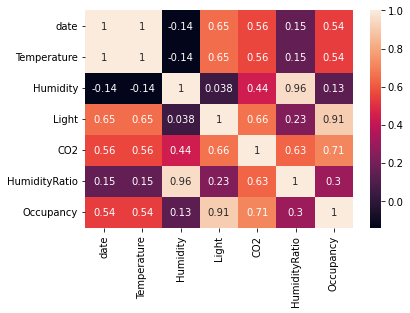

In [16]:
sns.heatmap(datatr.corr(), annot = True)

In [17]:
datatr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   int16  
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   float64
dtypes: float64(6), int16(1)
memory usage: 461.2 KB


In [18]:
datatr.shape

(8143, 7)

In [19]:
datatr.count()

date             8143
Temperature      8143
Humidity         8143
Light            8143
CO2              8143
HumidityRatio    8143
Occupancy        8143
dtype: int64

In [26]:
x = datatr.drop(['Occupancy'], axis=1)
y = datatr['Occupancy']
print(x)

      date  Temperature  Humidity     Light       CO2  HumidityRatio
1      264     1.000000  0.470533  0.275490  0.190933       0.557318
2      263     0.992823  0.470332  0.277754  0.186446       0.554807
3      263     0.992823  0.469326  0.275490  0.186136       0.553761
4      263     0.992823  0.467315  0.275490  0.182887       0.551669
5      262     0.980861  0.467315  0.275490  0.180566       0.547851
...    ...          ...       ...       ...       ...            ...
8139   129     0.490431  0.865013  0.280017  0.231781       0.763986
8140   129     0.490431  0.860431  0.280017  0.233173       0.759782
8141   132     0.502392  0.864901  0.280017  0.238744       0.768438
8142   132     0.502392  0.872276  0.280017  0.252256       0.775226
8143   132     0.502392  0.869594  0.289071  0.252669       0.772758

[8143 rows x 6 columns]


In [21]:
from sklearn.model_selection import train_test_split #для разделения датасетов 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3) #наборы обучиить/протестировать

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score 

KNN = KNeighborsClassifier()#классификатор к сосоедей

search = GridSearchCV(KNN, {'n_neighbors': range (1,55)})#ищем подходящие параметры кол- во соседей выбираем соседей для точной классификации 
search.fit(x_train, y_train)#заносим x и y чтобы максимально совпадали

n = search.best_estimator_.n_neighbors#наилучший результат кол - ва соседей

KNN = KNeighborsClassifier(n_neighbors = n)#в классификатор заносим кол-во соседей
KNN.fit(x_train, y_train)#заносим обучающую выборку
print("Accuracy of KNN model:", accuracy_score(y_test, KNN.predict(x_test)))
print('Best accuracy:', search.best_score_)

Accuracy of KNN model: 0.9778960294719607
Best accuracy: 0.9663157894736841


In [23]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier() # классификатор дерева ршений

DTC_grid = GridSearchCV(DTC, {'max_depth': list(range(1, 6)), 'max_features': list(range(1, 6))})
DTC_grid.fit (x_train, y_train)

best_depth = DTC_grid.best_estimator_.max_depth # Находим лучшую глубину
best_features = DTC_grid.best_estimator_.max_features # Находим лучшее количество признаков, которые следует учитывать при поиске

DTC = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
DTC.fit(x_train, y_train)

accuracy_score = np.mean(y_test == DTC.predict(x_test))
print("Accuracy of DTC model:",  accuracy_score)
print("Best accuracy:", DTC_grid.best_score_)

Accuracy of DTC model: 0.9938600081866558
Best accuracy: 0.992280701754386


D:\puthon\WPy64-39100\python-3.9.10.amd64\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
D:\puthon\WPy64-39100\python-3.9.10.amd64\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


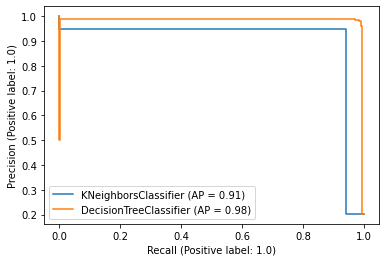

In [24]:
#полнота и точность
from sklearn.metrics import plot_precision_recall_curve
i = plot_precision_recall_curve(KNN, x_test, y_test)
g = plot_precision_recall_curve(DTC, x_test, y_test, ax=i.ax_)

D:\puthon\WPy64-39100\python-3.9.10.amd64\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
D:\puthon\WPy64-39100\python-3.9.10.amd64\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


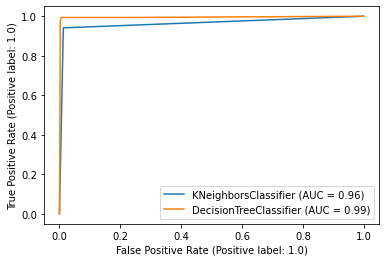

In [25]:
#доля правильных и доля неправильных
from sklearn.metrics import plot_roc_curve
i = plot_roc_curve(KNN, x_test, y_test)
g = plot_roc_curve(DTC, x_test, y_test, ax = i.ax_)